### 라이브러리

In [1]:
import warnings
warnings.filterwarnings('ignore')

import yaml
import pandas as pd
import numpy as np
from time import strftime, localtime

from utils import load_20newsgroups, load_imdb, preprocess
from viz import plot_experiment_v1, plot_experiment_v2, plot_embeddings_imdb, plot_embeddings_20news
from trainer import Trainer
from kernel import weighted_jaccard_kernel

In [2]:
# config 불러오기
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)
    
# 설정값
size_per_class=config['SIZE_PER_CLASS']
sample_size=config['SAMPLE_SIZE']
num_words=config['NUM_WORDS']

print("Configuration Settings:")
print("-" * 40)
print(f"(20newsgroups) Size per Class : {size_per_class}")
print(f"(IMDB) Sample Size            : {sample_size}")
print(f"(IMDB) Number of Words        : {num_words}")
print("-" * 40)

Configuration Settings:
----------------------------------------
(20newsgroups) Size per Class : 150
(IMDB) Sample Size            : 5000
(IMDB) Number of Words        : 5000
----------------------------------------


### 실험 진행을 위한 함수

In [3]:
# 20newsgroups 실험
def main1():
    print("\n[실험 1] 20newsgroups 데이터셋을 활용한 다중분류 성능 비교\n")
    
    X, y = load_20newsgroups(size_per_class=size_per_class, random_state=42) # 250개씩 20개 클래스 => 5000개
    X_train, X_test, y_train, y_test = preprocess(X, y)

    # 학습 시작
    trainer = Trainer(X_train, X_test, y_train, y_test)
    result = trainer.train_all_models()
    
    print('\n[실험 1] 다중분류 성능 비교 결과\n')
    print(result)
    
    return result

# IMDB 실험
def main2():
    print("\n[실험 2] IMDB 데이터셋을 활용한 이진분류 성능 비교\n")
    
    X, y = load_imdb(sample_size=sample_size, num_words=num_words) # 5000개
    X_train, X_test, y_train, y_test = preprocess(X, y, is_imdb=True)

    # 학습 시작
    trainer = Trainer(X_train, X_test, y_train, y_test)
    result = trainer.train_all_models()
    
    print('\n[실험 2] 이진분류 성능 비교 결과\n')
    print(result)
    
    return result

# IMDB 데이터셋의 크기와 num_words에 따른 성능 비교 실험
def main3():
    print("\n[실험 3] IMDB 데이터셋의 크기와 num_words에 따른 성능 비교")
    
    sample_sizes = [500, 1000, 2000, 3000, 4000, 5000]
    num_words_list = [1000, 2000, 3000, 4000, 5000]
    
    result = []
    total_steps = len(sample_sizes) * len(num_words_list)
    
    for i, sample_size in enumerate(sample_sizes):
        for j, num_words in enumerate(num_words_list):
            step_count = i * len(num_words_list) + j + 1
            print(f"\n[Experiment 3 | Step {step_count}/{total_steps}] sample_size={sample_size}, num_words={num_words}")
            
            X, y = load_imdb(sample_size=sample_size, num_words=num_words)
            X_train, X_test, y_train, y_test = preprocess(X, y, is_imdb=True)
            
            # 학습 시작
            trainer = Trainer(X_train, X_test, y_train, y_test)
            model_result = trainer.train_all_models(only_target=True)
            
            model_result['sample_size'] = sample_size
            model_result['num_words'] = num_words
            
            result.append(model_result)
    
    print("\n[실험 3] IMDB 데이터셋의 크기와 num_words에 따른 성능 비교 결과\n")
    print(result)
    
    return pd.concat(result, ignore_index=True)

# 20Newsgroups 데이터셋 임베딩 벡터 시각화 실험
def viz1():
    print("\n[실험 4] 20Newsgroups 데이터셋 임베딩 벡터 시각화\n")

    # Load and preprocess data
    X, y = load_20newsgroups(size_per_class=size_per_class, random_state=42)
    X_train, _, y_train, _ = preprocess(X, y)

    # Apply custom kernel
    print(f'({strftime("%Y-%m-%d %H:%M", localtime())}) Custom Kernel 적용 시작...')
    X_kernel = weighted_jaccard_kernel(X_train, X_train)
    print(f'({strftime("%Y-%m-%d %H:%M", localtime())}) Custom Kernel 적용 완료')

    # Visualize embeddings
    unique_classes = np.unique(y_train)
    plot_embeddings_20news(X_train, X_kernel, y_train, unique_classes)

# IMDB 데이터셋의 임베딩 벡터 시각화 실험
def viz2():
    print("\n[실험 5] IMDB 데이터셋의 임베딩 벡터 시각화\n")
    
    # Load and preprocess data
    X, y = load_imdb(sample_size=sample_size, num_words=num_words)
    X_train, _, y_train, _ = preprocess(X, y, is_imdb=True)

    # Apply custom kernel
    print(f'({strftime("%Y-%m-%d %H:%M", localtime())}) Custom Kernel 적용 시작...')
    X_kernel = weighted_jaccard_kernel(X_train, X_train)
    print(f'({strftime("%Y-%m-%d %H:%M", localtime())}) Custom Kernel 적용 완료')

    # Visualize embeddings
    plot_embeddings_imdb(X_train, X_kernel, y_train)

### 데이터셋 임베딩 시각화

In [4]:
if __name__ == '__main__':
    # 데이터셋 시각화
    viz1()
    viz2()


[실험 4] 20Newsgroups 데이터셋 임베딩 벡터 시각화

(2024-12-22 00:10) 20newsgroups 데이터셋 로드 중...


샘플링 진행: 100%|██████████| 20/20 [00:01<00:00, 13.89it/s]


(2024-12-22 00:11) 20newsgroups 데이터셋 로드 완료 >>> 총 3000개의 데이터
(2024-12-22 00:11) 20newsgroups 데이터 전처리 및 tf-idf 벡터화 중...
(2024-12-22 00:11) 20newsgroups 데이터 전처리 및 tf-idf 벡터화 완료
(2024-12-22 00:11) Custom Kernel 적용 시작...


KeyboardInterrupt: 

### 실험 1


[실험 1] 20newsgroups 데이터셋을 활용한 다중분류 성능 비교

(2024-12-20 23:12) 20newsgroups 데이터셋 로드 중...


샘플링 진행: 100%|██████████| 20/20 [00:01<00:00, 14.37it/s]


(2024-12-20 23:12) 20newsgroups 데이터셋 로드 완료 >>> 총 3000개의 데이터
(2024-12-20 23:12) 20newsgroups 데이터 전처리 및 tf-idf 벡터화 중...
(2024-12-20 23:12) 20newsgroups 데이터 전처리 및 tf-idf 벡터화 완료
(2024-12-20 23:12) 타겟 모델 학습 시작...
▶ Weighted Jaccard SVM 학습 시작...
▶ Weighted Jaccard SVM 학습 완료 (Training Time: 310.75s)
(2024-12-20 23:18) 타겟 모델 학습 종료
(2024-12-20 23:18) 비교 모델 학습 시작...
▶ Linear SVM 학습 시작...
▶ Linear SVM 학습 완료 (Training Time: 229.87s)
▶ Logistic Regression 학습 시작...
▶ Logistic Regression 학습 완료 (Training Time: 10.63s)
▶ KNN(K=3) 학습 시작...
▶ KNN(K=3) 학습 완료 (Training Time: 0.05s)
▶ KNN(K=5) 학습 시작...
▶ KNN(K=5) 학습 완료 (Training Time: 0.02s)
▶ Naive Bayes 학습 시작...
▶ Naive Bayes 학습 완료 (Training Time: 0.15s)
▶ Decision Tree 학습 시작...
▶ Decision Tree 학습 완료 (Training Time: 15.78s)
▶ Random Forest 학습 시작...
▶ Random Forest 학습 완료 (Training Time: 11.50s)
▶ SGD 학습 시작...
▶ SGD 학습 완료 (Training Time: 36.10s)
(2024-12-20 23:23)) 비교 모델 학습 종료

[실험 1] 다중분류 성능 비교 결과

                  Model  Accuracy  Precision    Recall  F1

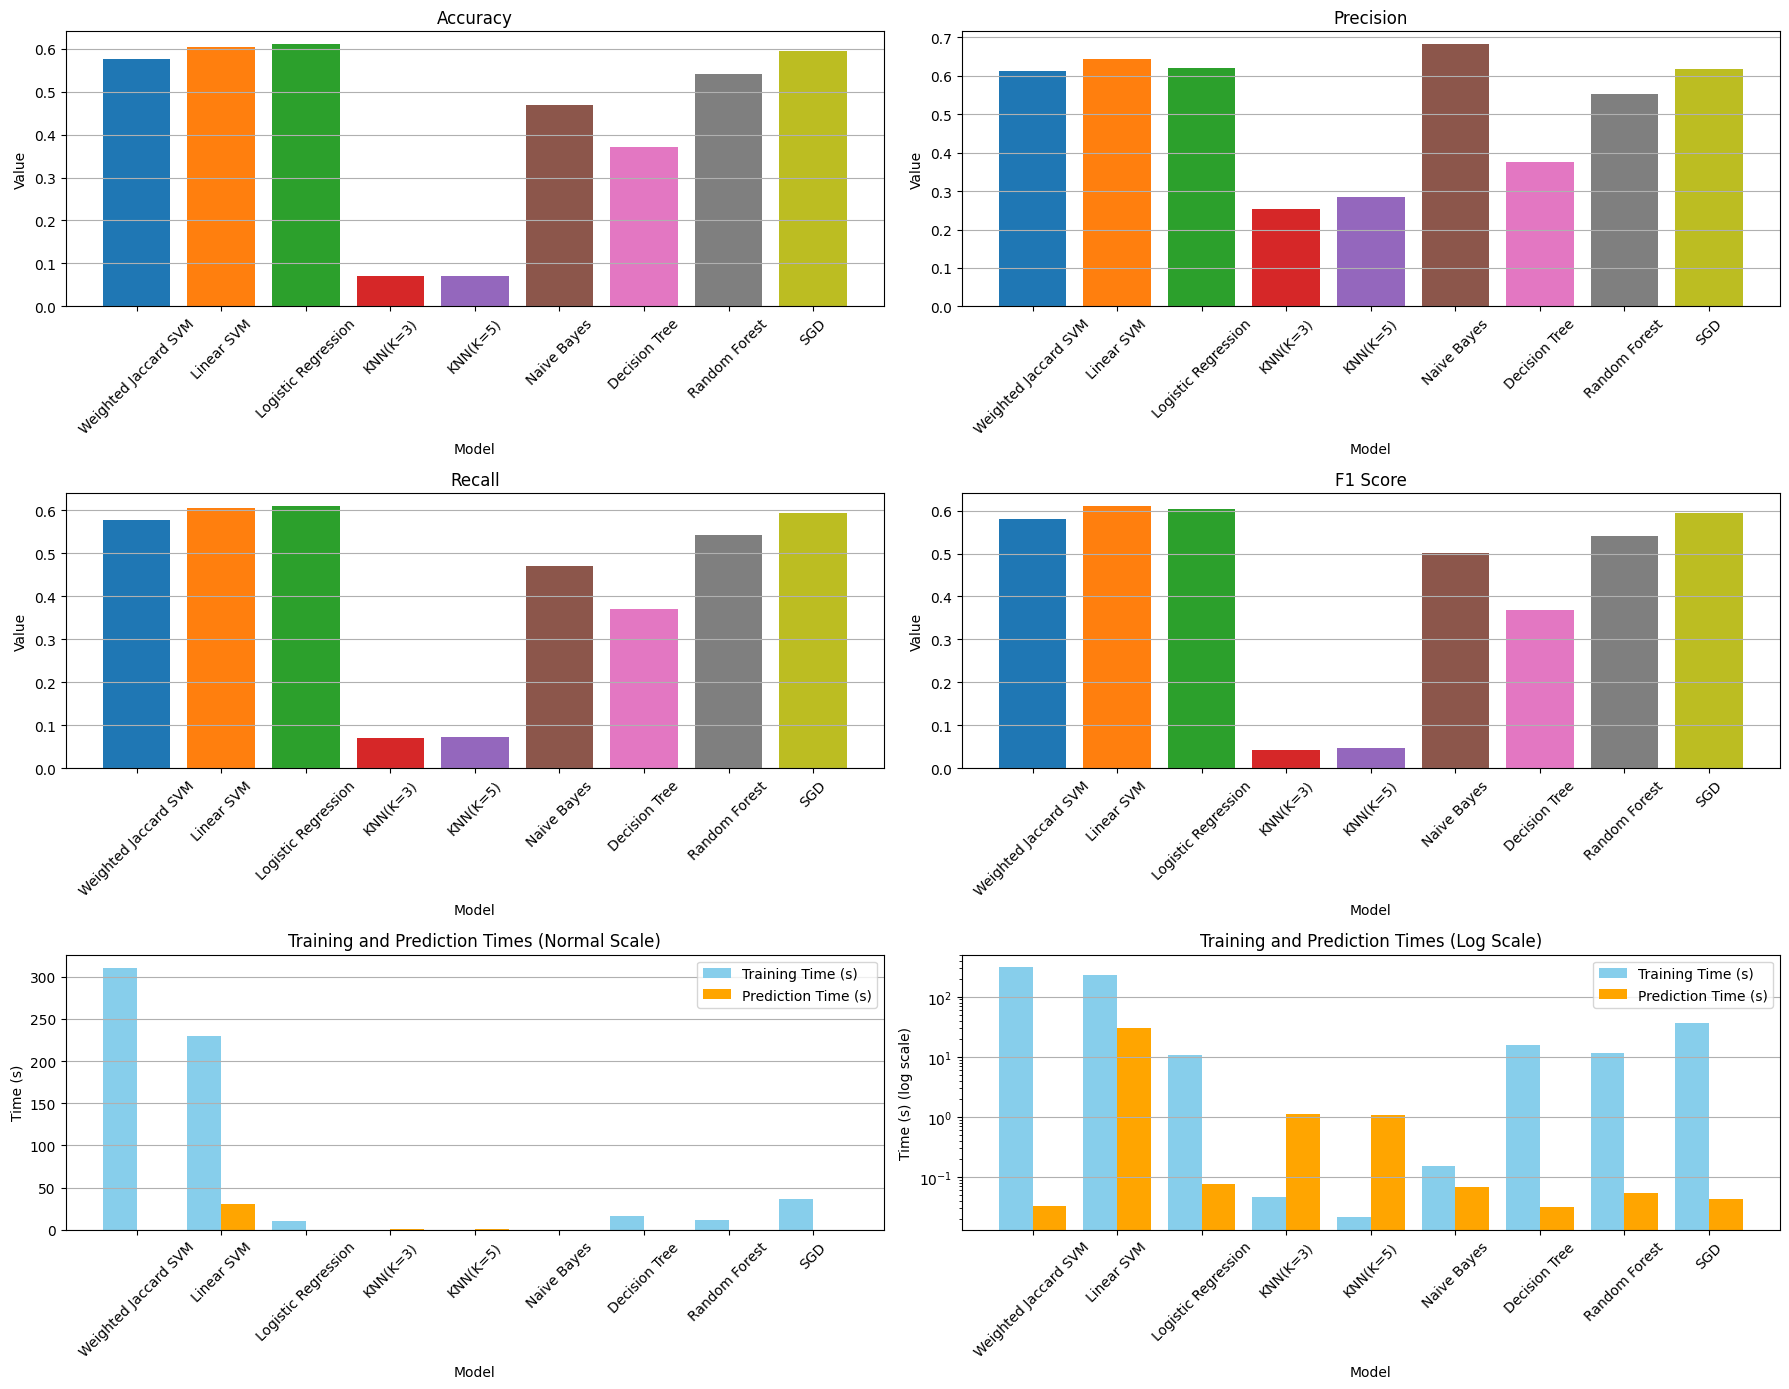

In [35]:
if __name__ == '__main__':
    result1 = main1()
    plot_experiment_v1(result1)
    result1.to_csv('result1.csv', index=False)

### 실험 2


[실험 2] IMDB 데이터셋을 활용한 이진분류 성능 비교

(2024-12-20 23:23) IMDB 데이터셋 로드 중...
(2024-12-20 23:23) IMDB 데이터셋 로드 완료 >>> 총 5000개의 데이터
(2024-12-20 23:23) IMDB 데이터 전처리 및 tf-idf 벡터화 중...
(2024-12-20 23:23) IMDB 데이터 전처리 및 tf-idf 벡터화 완료
(2024-12-20 23:23) 타겟 모델 학습 시작...
▶ Weighted Jaccard SVM 학습 시작...
▶ Weighted Jaccard SVM 학습 완료 (Training Time: 110.20s)
(2024-12-20 23:25) 타겟 모델 학습 종료
(2024-12-20 23:25) 비교 모델 학습 시작...
▶ Linear SVM 학습 시작...
▶ Linear SVM 학습 완료 (Training Time: 14.13s)
▶ Logistic Regression 학습 시작...
▶ Logistic Regression 학습 완료 (Training Time: 0.22s)
▶ KNN(K=3) 학습 시작...
▶ KNN(K=3) 학습 완료 (Training Time: 0.00s)
▶ KNN(K=5) 학습 시작...
▶ KNN(K=5) 학습 완료 (Training Time: 0.00s)
▶ Naive Bayes 학습 시작...
▶ Naive Bayes 학습 완료 (Training Time: 0.01s)
▶ Decision Tree 학습 시작...
▶ Decision Tree 학습 완료 (Training Time: 1.72s)
▶ Random Forest 학습 시작...
▶ Random Forest 학습 완료 (Training Time: 1.93s)
▶ SGD 학습 시작...
▶ SGD 학습 완료 (Training Time: 0.59s)
(2024-12-20 23:25)) 비교 모델 학습 종료

[실험 2] 이진분류 성능 비교 결과

               

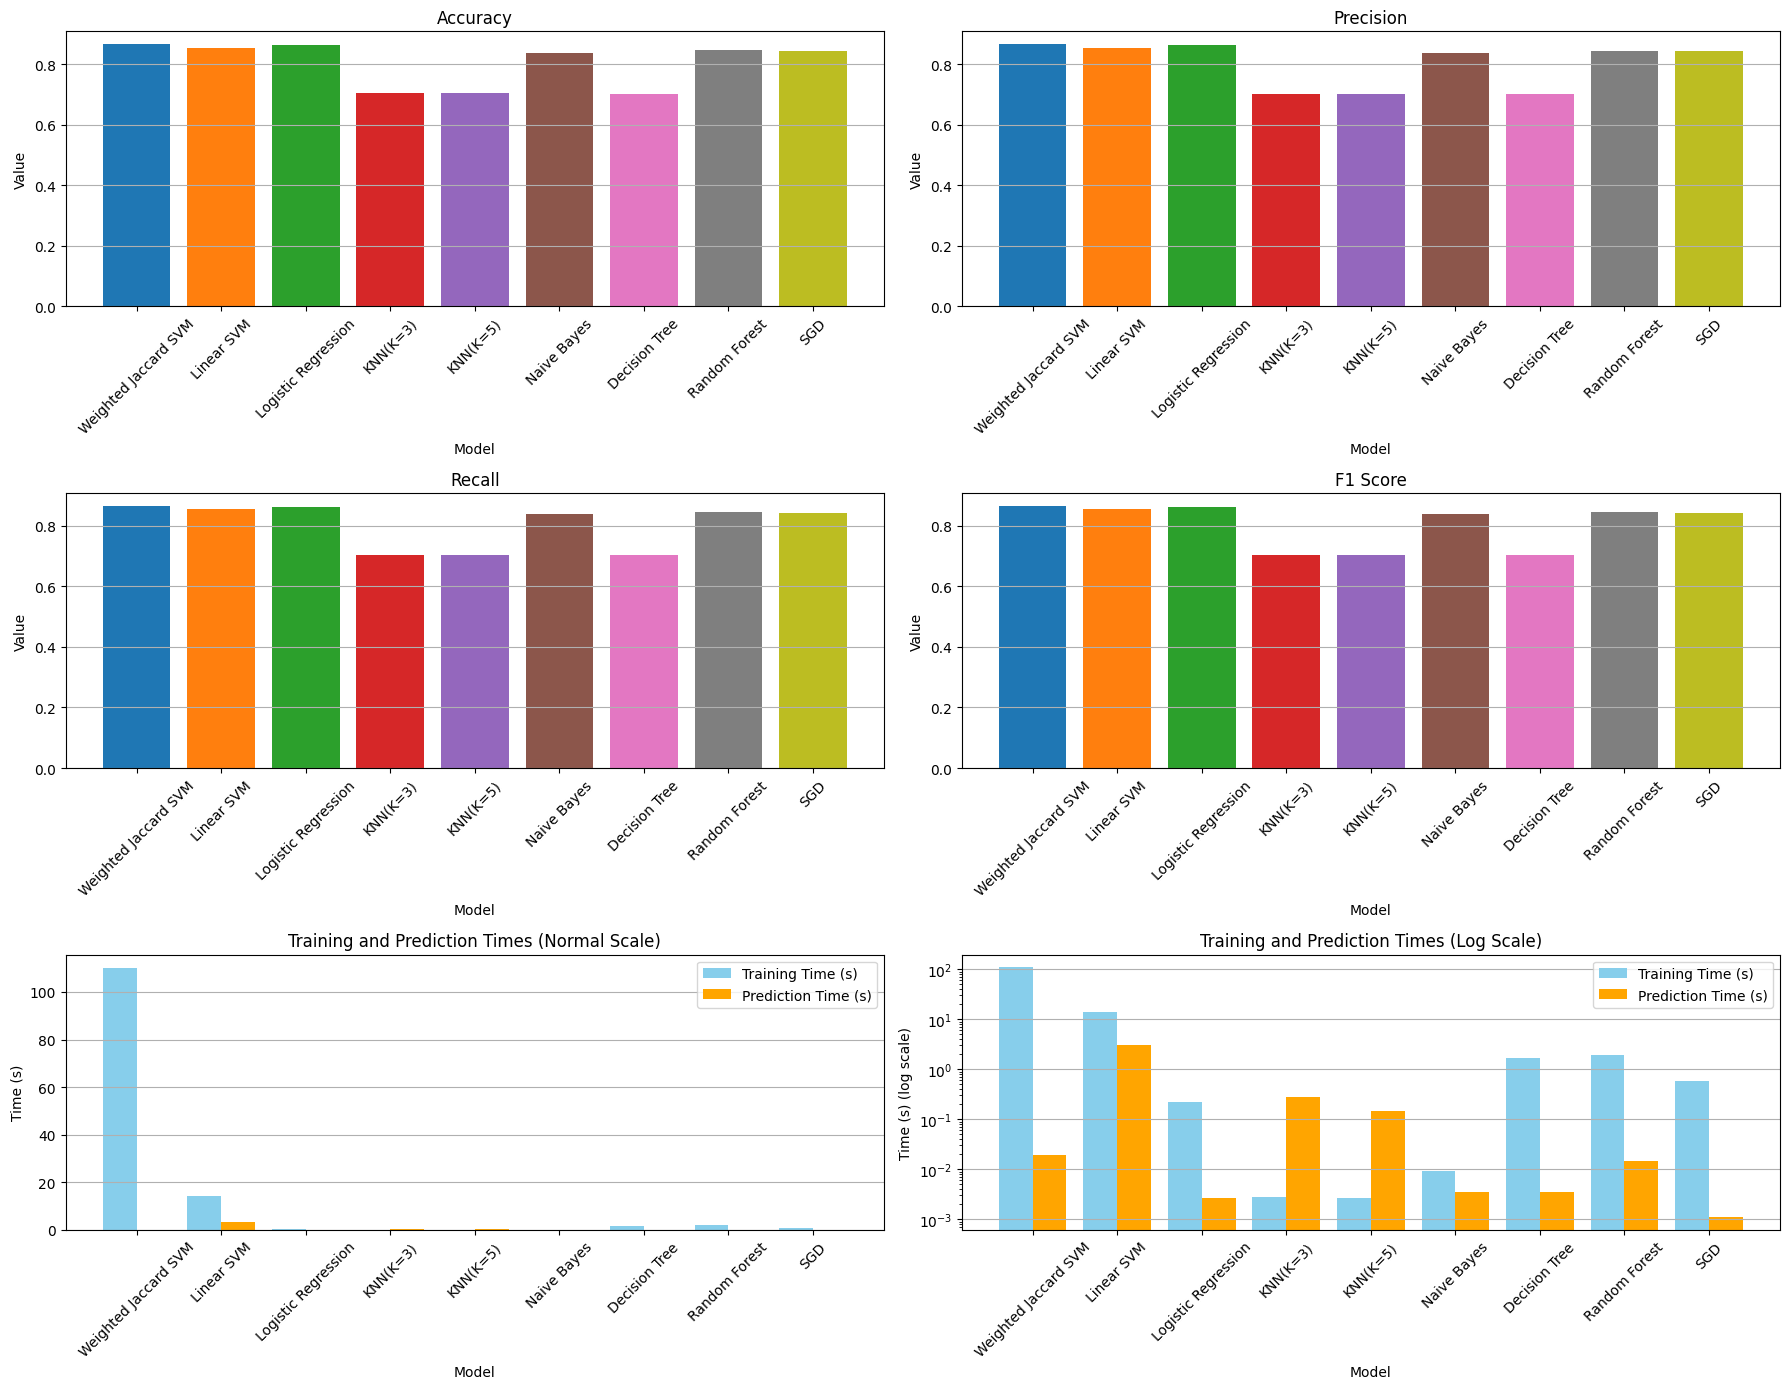

In [36]:
if __name__ == '__main__':
    result2 = main2()
    plot_experiment_v1(result2)
    result2.to_csv('result2.csv', index=False)

### 실험 3


[실험 3] IMDB 데이터셋의 크기와 num_words에 따른 성능 비교

[Experiment 3 | Step 1/30] sample_size=500, num_words=1000
(2024-12-20 23:25) IMDB 데이터셋 로드 중...
(2024-12-20 23:25) IMDB 데이터셋 로드 완료 >>> 총 500개의 데이터
(2024-12-20 23:25) IMDB 데이터 전처리 및 tf-idf 벡터화 중...
(2024-12-20 23:25) IMDB 데이터 전처리 및 tf-idf 벡터화 완료
(2024-12-20 23:25) 타겟 모델 학습 시작...
▶ Weighted Jaccard SVM 학습 시작...
▶ Weighted Jaccard SVM 학습 완료 (Training Time: 0.79s)
(2024-12-20 23:26) 타겟 모델 학습 종료

[Experiment 3 | Step 2/30] sample_size=500, num_words=2000
(2024-12-20 23:26) IMDB 데이터셋 로드 중...
(2024-12-20 23:26) IMDB 데이터셋 로드 완료 >>> 총 500개의 데이터
(2024-12-20 23:26) IMDB 데이터 전처리 및 tf-idf 벡터화 중...
(2024-12-20 23:26) IMDB 데이터 전처리 및 tf-idf 벡터화 완료
(2024-12-20 23:26) 타겟 모델 학습 시작...
▶ Weighted Jaccard SVM 학습 시작...
▶ Weighted Jaccard SVM 학습 완료 (Training Time: 0.92s)
(2024-12-20 23:26) 타겟 모델 학습 종료

[Experiment 3 | Step 3/30] sample_size=500, num_words=3000
(2024-12-20 23:26) IMDB 데이터셋 로드 중...
(2024-12-20 23:26) IMDB 데이터셋 로드 완료 >>> 총 500개의 데이터
(2024-12-20 23:26) 

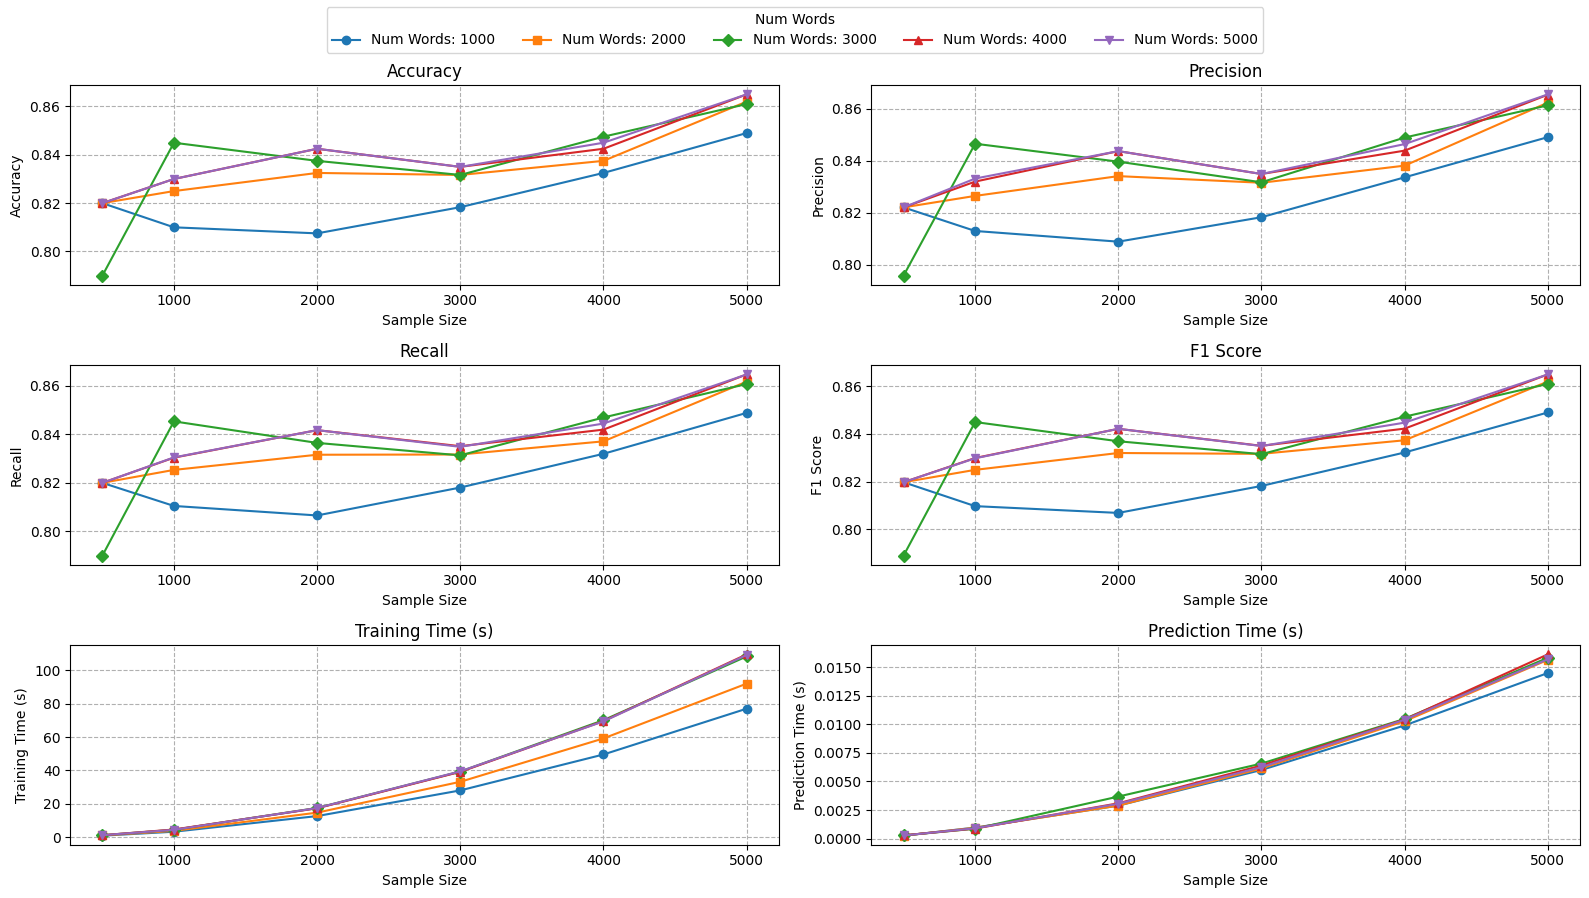

In [37]:
if __name__ == '__main__':
    result3 = main3()
    plot_experiment_v2(result3)
    result3.to_csv('result3.csv', index=False)